# SMAC/CRISTAL/ULille

Auteur : Philippe Mathieu, CRISTAL Lab, SMAC Team, University of Lille, email : philippe.mathieu@univ-lille.fr

Date : 13 march 2020

## Simulation of epidemics

# An exponential phenomenon

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

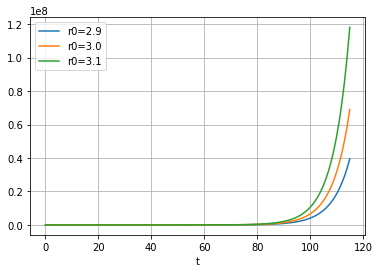

In [4]:
# Une personne infecte r0 personnes toutes les d unités de temps 
def f(x,r0) :
    return np.round(r0**(x/d),2)

d=7
t=np.arange(0,116)
df = pd.DataFrame()
df['t']=t
for r0 in [2.9 , 3.0 , 3.1] :
    name='r0='+str(r0)
    df[name]=f(t,r0)

# pd.options.display.float_format = '{:10,.5f}'.format
df.plot(x='t' , kind='line', grid=True)

plt.show()
# plt.savefig('exponentielle.png', bbox_inches='tight')

In [5]:
d=1
# Si chaque personne en contamine 3 chaque jour, au bout de 12 jours combien sont contaminés ?
print(f(12,3))
# Si on divise R par 2 (donc R0=1.5), combien obtient-on cette fois ci ?
print(f(12,1.5))

531441.0
129.75


# The continuous approach

Montrer ici ce qu'on "sait" faire avec scipy mais aussi ce qu'on ne sait pas faire !

# The discreet approach

## A SIR model based on percentages

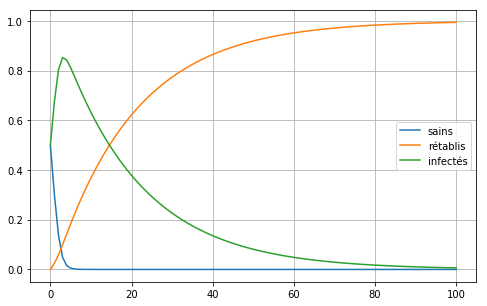

In [6]:
tauxTransmiss=0.8  # beta
tauxGueris=0.05    # gamma

I=[0.5]
S=[0.5]
R=[0.0]

import matplotlib.pyplot as plt

for j in range(100):
    nouveauxCas = tauxTransmiss*S[-1]*I[-1]
    nouveauxGueris=tauxGueris*I[-1]
    #
    S.append(S[-1]-nouveauxCas) 
    R.append(R[-1]+nouveauxGueris)
    I.append(I[-1]+nouveauxCas-nouveauxGueris)
    assert(round(S[-1]+I[-1]+R[-1],3) == 1) # la somme fait toujours 1

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(S,label="sains")
plt.plot(R,label="rétablis")
plt.plot(I,label="infectés")
plt.legend(loc="best")
plt.grid()
plt.show()

# 0.8 0.05
#plt.savefig('fig1_sir_pessimiste.png', bbox_inches='tight')

# 0.2 0.09
#plt.savefig('fig2_sir_optimiste.png', bbox_inches='tight')


Super .... c'est la courbe classique de tous les papiers sur le sujet

Maintenant, tout est linéarisé ! c'est clairement trop simple: ne serait-ce que modéliser gamma par 1/duree

Reste à savoir ce que les matheux savent faire avec ça ?

# SIR avec phases de confinement

On définit le modèle SIR :

In [293]:
def SIR_increment(I, S, R, liste_tauxTransmiss, tauxGueris):
    for tauxTransmiss in liste_tauxTransmiss:
        nouveauxCas = tauxTransmiss*S[-1]*I[-1]
        nouveauxGueris=tauxGueris*I[-1]
        #
        S.append(S[-1]-nouveauxCas) 
        R.append(R[-1]+nouveauxGueris)
        I.append(I[-1]+nouveauxCas-nouveauxGueris)
        assert(round(S[-1]+I[-1]+R[-1],3) == 1) # la somme fait toujours 1
    return None

Par initiale de la population infectée :

In [294]:
I=[0.0005]
S=[0.9995]
R=[0.0]

Evolution du taux de transmission:

In [295]:
p_1 = [0.8] * 10 # Avant confinement
p_2 = np.linspace(0.8,0.01, 5) # Debut du confinement
p_3 = [0.01] * 10 # Confinement
p_4 = np.linspace(0.01,0.5, 5) # Relachement du confinement
p_5 = [0.5] * 10 # Retour à la normale avec gestes barrières
p_6 = np.linspace(0.5,0.01, 5) # Retour au confinement
p_7 = [0.01] * 10 # Confinement
liste_tauxTransmiss = np.concatenate([p_1, p_2, p_3, p_4, p_5, p_6, p_7])

On lance l'épidémie avec une durée de guérison de :

In [296]:
SIR_increment(I, S, R, liste_tauxTransmiss, 0.15)

On trace le graphe.

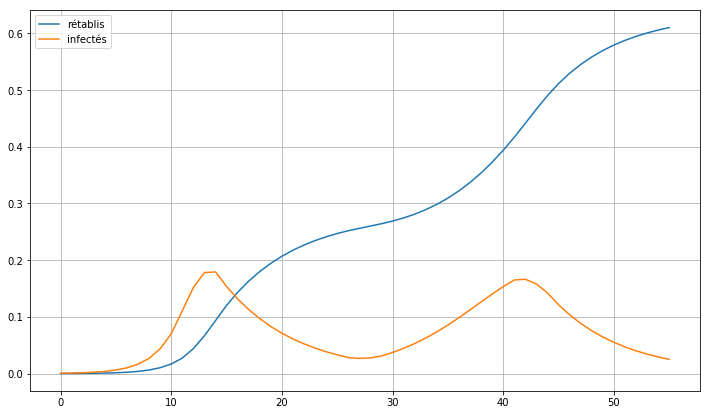

In [297]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(R,label="rétablis")
plt.plot(I,label="infectés")
plt.legend(loc="best")
plt.grid()

## The same model but with integer data and real dates

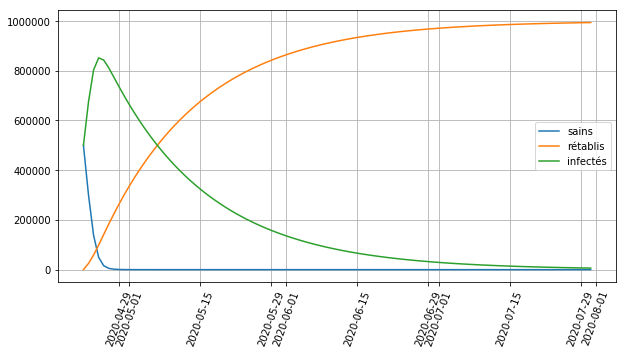

In [7]:
# si on souhaite gérer de vraies dates
import datetime
#debut=datetime.date(2020,3,15)         # date de début de l'épidémie
debut=datetime.date.today()
unjour=datetime.timedelta(days=1)      # interval de 1j 

pop=1000000
tauxTransmiss=0.8  # beta
tauxGueris=0.05    # gamma

I=[pop/2]
S=[pop/2]
R=[0]

import matplotlib.pyplot as plt

for j in range(100):
    # le changement est ici : on divise par la pop pour avoir un pourcentage
    nouveauxCas = round(tauxTransmiss*S[-1]*I[-1]/pop)
    nouveauxGueris= round(tauxGueris*I[-1])
    #assert nouveauxCas>=1 , "S={} I={} nouveauxCas={}".format(S[-1],I[-1],nouveauxCas)
    #assert nouveauxGueris>=1 , "S={} I={} nouveauxGueris={}".format(S[-1],I[-1],nouveauxGueris)
    #print("{}\t\t{}\t\t{}\t\t{}\t\t{}".format(S[-1],I[-1],R[-1],nouveauxCas,nouveauxGueris))
    #
    S.append(S[-1]-nouveauxCas) 
    R.append(R[-1]+nouveauxGueris)
    I.append(I[-1]+nouveauxCas-nouveauxGueris)
    assert(S[-1]+I[-1]+R[-1] == pop) # la somme fait toujours pop
    
fig, ax = plt.subplots(figsize=(10,5))
# gestion des dates
plt.xticks(rotation=70)      # incliner les x pour les dates
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#ax.xaxis.set_major_locator(mdates.DayLocator()) # jouer sur le nombre de ticks en x et y
# ax.xaxis.set_major_locator(plt.MaxNLocator(5)) 
#ax.yaxis.set_major_locator(plt.MaxNLocator(20))
jours=[]
for j in range(0,len(S)): jours.append(debut+datetime.timedelta(j))

plt.plot(jours,S,label="sains")
plt.plot(jours,R,label="rétablis")
plt.plot(jours,I,label="infectés")
plt.legend(loc="best")
plt.grid()
plt.show()

# 0.8 0.05
#plt.savefig('fig1_sir_pessimiste.png', bbox_inches='tight')

# 0.2 0.09
#plt.savefig('fig2_sir_optimiste.png', bbox_inches='tight')


Super ... on obtient exactement la même chose que précédemment.

L'avantage maintenant, c'est que l'on peut facilement voir ce que ça donne à partir d'1 seul infecté

## Quelques essais pour jouer sur les contacts
On reprend ici même modèle, mais sans les dates (qui rendent la lecture imprecise)
R0=contacts*duree*tauxTransmiss

On sait que duree=14 et que RO compris entre 2.2 et 2.6

par ailleurs, le taux de guerison est égal dans le smodèles théoriques, à 1/duree

r0=2.20, tauxtransmiss=0.8000


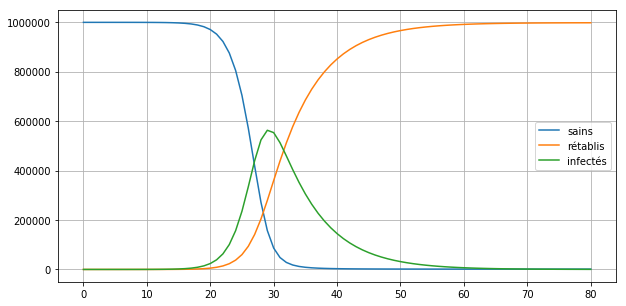

In [8]:
pop=1000000

r0=2.2
duree=7
contacts=15
tauxTransmiss=0.8 #r0/(duree*contacts)
print("r0={:.2f}, tauxtransmiss={:.4f}".format(r0,tauxTransmiss))

I=[1]
S=[pop-1]
R=[0]

import matplotlib.pyplot as plt

for j in range(80):
    # le changement est ici : on divise par la pop pour avoir un pourcentage
    nouveauxCas = (tauxTransmiss*S[-1]*I[-1]/pop)
    nouveauxGueris= ((1/duree)*I[-1])
    #assert nouveauxCas>=1 , "S={} I={} nouveauxCas={}".format(S[-1],I[-1],nouveauxCas)
    #assert nouveauxGueris>=1 , "S={} I={} nouveauxGueris={}".format(S[-1],I[-1],nouveauxGueris)
    #print("{}\t\t{}\t\t{}\t\t{}\t\t{}".format(S[-1],I[-1],R[-1],nouveauxCas,nouveauxGueris))
    #
    S.append(S[-1]-nouveauxCas) 
    R.append(R[-1]+nouveauxGueris)
    I.append(I[-1]+nouveauxCas-nouveauxGueris)
    #assert(S[-1]+I[-1]+R[-1] == pop) # la somme fait toujours pop
    
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(S,label="sains")
plt.plot(R,label="rétablis")
plt.plot(I,label="infectés")
plt.legend(loc="best")
plt.grid()
plt.show()

Ben là ça déconne grave .... ça ne monte pas si mon taux est inférieur à 0.2

par ailleurs, pourquoi j'ai 500000 rétablis avec très peu d'infectés

par ailleurs comment on illustre l'immunité collective ?

# Un modèle SIRM en pourcentage

In [ ]:
tauxTransmiss=0.8   # les contacts
tauxMortalite=0.005  # taux gueris = 1/tauxMortalite
tauxGuerison=0.05

I=[0.5]
S=[0.5]
R=[0.0]
M=[0.0]

import matplotlib.pyplot as plt

for j in range(100):
    nouveauxCas = tauxTransmiss*S[-1]*I[-1]
    nouveauxGueris=tauxGuerison*I[-1]
    nouveauxDeces=tauxMortalite*I[-1]
    # On passe de S -> I -> (R ou M)
    S.append(S[-1]-nouveauxCas) 
    I.append(I[-1]+nouveauxCas-nouveauxGueris-nouveauxDeces)
    R.append(R[-1]+nouveauxGueris)
    M.append(M[-1]+nouveauxDeces) 
    assert(round(S[-1]+I[-1]+R[-1]+M[-1],3) == 1) # la somme fait toujours 1

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(S,label="sains")
plt.plot(R,label="remis")
plt.plot(I,label="infectes")
plt.plot(M,label="morts")
plt.legend(loc="best")
plt.grid()
plt.show()


# SIRM + contacts + données entieres et dates + confinement

In [ ]:
import numpy

# si on souhaite gérer de vraies dates
import datetime
debut=datetime.date(2020,3,15)         # date de début de l'épidémie
unjour=datetime.timedelta(days=1)      # interval de 1j 

pop=1000000
tauxTransmissDeconf = 0.8
tauxTransmissConf  = tauxTransmissDeconf/100
tauxTransmiss = tauxTransmissDeconf # On commence en déconfinement
periods = [18,90]

tauxMortalite=0.005
tauxGueris=0.05

I=[1]
S=[pop-1]
R=[0]
M=[0]

import matplotlib.pyplot as plt

for j in range(1,500):
#while I[-1] > 0.001 :
    # Changement de période
    if (j in periods) :
        if (tauxTransmiss == tauxTransmissConf) : 
            tauxTransmiss=tauxTransmissDeconf
        else : tauxTransmiss=tauxTransmissConf
        print(str(j)+" changement de periode : "+str(tauxTransmiss))

    nouveauxCas = tauxTransmiss*S[-1]*I[-1]/pop
    nouveauxGueris=tauxGueris*I[-1]
    nouveauxDeces=tauxMortalite*I[-1]    # taux mortalité = 1-tauxGueris  ???
    # On passe de S -> I -> (R ou M)
    S.append(S[-1]-nouveauxCas) 
    I.append(I[-1]+nouveauxCas-nouveauxGueris-nouveauxDeces)
    R.append(R[-1]+nouveauxGueris)
    M.append(M[-1]+nouveauxDeces) 
    #assert(round(S[-1]+I[-1]+R[-1]+M[-1],3) == 1) # la somme fait toujours 1

print("L'épidémie aura duré "+str(len(S))+" jour ,et termine avec "+str(round(M[-1],2))+" morts")

jours=[]
for j in range(0,len(S)): jours.append(debut+datetime.timedelta(j))
    
fig, ax = plt.subplots(figsize=(12,6))
plt.xticks(rotation=70)      # incliner les x pour les dates
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#ax.xaxis.set_major_locator(mdates.DayLocator()) # jouer sur le nombre de ticks en x et y
# ax.xaxis.set_major_locator(plt.MaxNLocator(5)) 
ax.yaxis.set_major_locator(plt.MaxNLocator(20))

#plt.plot(jours,S,label="sains")  # [s*pop for s in S]
#plt.plot(jours,R,label="remis")
plt.plot(jours,I,label="infectes")
plt.plot(jours,M,label="morts")
#plt.axvline(x='2020/05/01', color='black', linewidth=1, linestyle=(0, (5,10)))
#plt.axhline(y=100000, color='black', linewidth=1, linestyle=(0, (5,10)))

plt.legend(loc="best")
plt.grid()
plt.show()
#plt.savefig("plot.png")

import pandas as pd
# pd.options.display.float_format = '{:10,.5f}'.format   # pour éviter la notation scientifique

df = pd.DataFrame()
df['S']=S
df['I']=I
df['R']=R
df['M']=M
df['somme']=df['S']+df['I']+df['R']+df['M']
print(df)


# L'approche Louapre

Ici il calcule principament des malades : les sains sont calculés par différence entre pop et ce qui reste

In [ ]:
import math

pop=70000000.0
contacts=25            # sur la totalité de la maladie
duree=10
tauxTransmiss=0.25/100   # pour 1 contact
tauxMortalite=3.0/100      # sur la totalité de la maladie

print("R0={}".format(nbContacts*tauxTransmiss*duree))

malades=[2000]  # malades sur la periode
remis=[200]     # remis sur la periode
morts=[50]      # morts sur la periode
sains=[pop-malades[-1]-remis[-1]-morts[-1]]


for j in range(1,180): # 3 mois
    nouveauxMalades = (malades[-1]*contacts*tauxTransmiss*(sains[-1]/pop))
    nouveauxRemis   = (malades[-1]*(1/duree))
    nouveauxMorts   = (malades[-1]*(tauxMortalite/duree))
    #
    malades.append(malades[-1]+nouveauxMalades-nouveauxRemis-nouveauxMorts)
    remis.append(remis[-1]+nouveauxRemis)
    morts.append(morts[-1]+nouveauxMorts)
    sains.append(pop-malades[-1]-remis[-1]-morts[-1])
    assert(sains[-1]+malades[-1]+remis[-1]+morts[-1]==pop)

print("Nombre de morts = {:6.2f}".format(morts[-1]))
import pandas as pd
df = pd.DataFrame()
df['S']=sains
df['M']=malades
df['R']=remis
df['Morts']=morts
pd.options.display.float_format = '{:6.1f}'.format
print(df)

plt.figure(figsize=(10,5))
#plt.plot(sains,label="sains")  # [s*pop for s in S]
plt.plot(remis,label="remis")
plt.plot(malades,label="infectes")
plt.plot(morts,label="morts")
plt.show()

Il part du principe que les sains sont à chaque t , calculés par soustractions des autres boites à partir de la population total (sains=pop-malades-remis-morts).

Au bout du compte en quoi c'est vraiment différent des approches du dessus ?

# Une autre approche plus réaliste

Celle de christian rabaud

ici , quand on calcule les morts, qui sont dans cet état après 15j d'état grave, on va chercher la valeur à t-15
Selon moi, c'est nettement plus réalise


le bout de code ci-dessous ne fonctionne pas encore vraiment

In [ ]:
# Modele de Christian Rabaux

import matplotlib.pyplot as plt

# parametres
pop=612056+369641; # taille de la population
r0=2.3;            # taux de contagion
r0c=0.8;           # taux de contagion en confinement
jc=48;   # delai entre jO et confinement
taux_cg=0.05;      # taux de cas graves
taux_g=0.81;       # taux de guerison
taux_dc=0.5;       # taux de deces hospitaliers
dscg=9;            # duree de sejour cas graves
dacv=9;            # duree apparition d'un cas grave
capa_rea=167;      # capacite de rea en lits

# donnees initiales
jour=[0];
nouveaux_cas=[1.0];
nouveaux_cas_graves=[0.0];
cas_graves_cumules=[0.0];
occupation_rea=[0];
nouveaux_gueris=[0];
nouveaux_morts_hospitaliers=[0];
morts_hospitaliers_cumules=[0];
nombre_total_de_cas=[0];
gueris_cumules=[0];
effet_confinement=[0];
capa=[capa_rea]
depassement_capa=[True];
dix_rea=[0];

# evolution
for i in range(1,3) :
    jour.append(jour[-1]+3)
    if (jour[-1]>=6):
        # calcul ncduj
        if (effet_confinement[-1]>0):
            ncduj = effet_confinement[-1]
        elif (((pop-gueris_cumules[-1])*0.6)-nombre_total_de_cas[-1])<0 :
            ncduj=0
        else : ncduj = (nouveaux_cas[-1]*R0)*(((((pop-gueris_cumules[0]))*0.6)-nombre_total_de_cas[-1])/(((pop-gueris_cumules[-1]))*0.6))
        nouveaux_cas.append((ncduj+nouveaux_cas[-1])/2.0) # la moyenne pour remplir cette case
        nouveaux_cas.append(ncdj)
        nombre_total_de_cas.append(nombre_total_de_cas[-1]+nouveaux_cas[-1])
        
    if (jour[-1]>=9):
        nouveaux_cas_graves.append(nouveaux_cas[-3]*taux_cg) # A partir du jour 9
        cas_graves_cumules.append(cas_graves_cumules[-1]+nouveaux_cas_graves[-1])
        occupation_rea.append(occupation_rea[-1]+nouveaux_cas_graves[-1])
        nouveaux_gueris.append(nouveaux_cas[-3]*taux_g)
        gueris_cumules.append(gueris_cumules[-1]+nouveaux_gueris[-1])
    
    if (jour[-1]>=15):
        nouveaux_morts_hospitaliers.append(nouveaux_cas_graves[-2]*taux_dc)
        morts_hospitaliers_cumules.append(morts_hospitaliers_cumules[-1]+nouveaux_morts_hospitaliers[-1])
    
    if (pop*0.6 - nombre_total_de_cas[-2]) < 0 :
        effet_confinement.append(0)
    elif (jc+7-jour[-1]>0) :
        effet_confinement.append(0)
    else : effect_confinement.append((((nouveaux_cas[-2]+nouveaux_cas[-3])/2.0)*R0c)*((((pop)*0.6)-nombre_total_de_cas[-2])/((pop)*0.6)))

    capa.append(capa_rea)
    depassement_capa.append(capa[-1<occupation_rea[-1]])
    dix_rea.append(cas_graves_cumules[-1]>10)

plt.plot(capa,label="capa")
plt.plot(morts_hospitaliers_cumules,label="morts_hospitaliers_cumules")
plt.plot(nouveaux_morts_hospitaliers,label="nouveaux_morts_hospitalier")
plt.plot(occupation_rea,label="occupation_rea")
plt.plot(nouveaux_cas_graves,label="nouveaux_cas_graves")

plt.legend(loc="best")
plt.show()



# Bibliography
- M. J. Keeling and P. Rohani, [Modeling Infectious Diseases in Humans and Animals](https://press.princeton.edu/books/hardcover/9780691116174/modeling-infectious-diseases-in-humans-and-animals), Princeton (2007).
- W. Kermack and A. McKendrick, [A contribution to the mathematical theory of epidemics](http://alun.math.ncsu.edu/wp-content/uploads/sites/2/2017/01/kermack_27.pdf), Proc. R. Soc., A115 (1927), pp. 700–72
- Epirecip [cookbook](http://epirecip.es/epicookbook/) 
- P-Y; Boelle, [La modélisation des épidémies de maladies émergentes](http://www.annales.org/re/2008/re51/Boelle.pdf), Responsabilité & Environnement, N° 51, pp. 49-55, Juillet 2008
- Interstices, [Dossier "épidémies"](http://images.math.cnrs.fr/+-Epidemies-+.html), mars 2020 (notamment articles de [Corentin Bayette](http://images.math.cnrs.fr/Modelisation-d-une-epidemie-partie-1.html) et de [F Renchenmann](https://interstices.info/modeliser-la-propagation-dune-epidemie/))